# Comparative analysis of off-loading algorithms for snapshot positioning

## Guildlines
### <u>Dependencies</u>
Please download the library source from https://github.com/JonasBchrt/snapshot-gnss-algorithms, store all of the files of it and the ones in the respository in the same directory before running it.
! Python version used for this notebook is 3.7.1, remember to install all the packages in `requirements.txt`. It's very recommended to use this in a conda environment to avoid clashing with your own computer python.
### <u>Algorithms</u>
There are a total of six algorithms to be assessed:

- **"ls-single"**
- **"ls-linear"**
- **"ls-combo"**
- **"ls-sac"**
- **"mle"**
- **"ls-sac/mle"**

### <u>Experiments</u>
There are a total of three experiments, each of which will test the algorithms with different numbers of GNSS:

- Experiment 1: GPS + Galileo + BeiDou 
- Experiment 2: GPS + Galileo 
- Experiment 3: GPS 

The more satellites available, the slower and the more robust the experiment will be able to test the algorithms.

### <u>Datasets</u>
Multiple datasets, ranging from static to dynamic scenarios, are indexed from A to M. They are binary files that contain IQ data:
| Category | Static | Dynamic | Sampling Frequency (MHz) | Snapshot Duration (e-3s) | Snapshots | Source |
|:--------:|:------:|:-------:|:------------------------:|:------------------------:|:---------:|:------:|
| A        | x      |         | 4                        | 12                       | 181       | UO*     |
| B        | x      |         | 4                        | 12                       | 14        | UO     |
| C        | x      |         | 4                        | 12                       | 6         | UO     |
| D        | x      |         | 4                        | 12                       | 24        | UO     |
| E        |        | x       | 4                        | 12                       | 380       | UO     |
| F        |        | x       | 4                        | 12                       | 339       | UO     |
| G        |        | x       | 4                        | 12                       | 693       | UO     |
| H        |        | x       | 4                        | 12                       | 628       | UO     |
| I        |        | x       | 4                        | 12                       | 1023      | UO     |
| J        |        | x       | 4                        | 12                       | 346       | UO     |
| K        |        | x       | 4                        | 12                       | 66        | UO     |
| L        | x      |         | 5                        | 20                       | 63        | TUNI*   |
| M        | x      |         | 10                       | 20                       | 63        | TUNI   |

Based on your interest, you can choose one scenario or more to run the assessment. More information of the available scenarios can be found in data.txt in the project folder.

!!! L,M datasets are not processed and pickled yet.

<small>**UO = University of Oxford, TUNI=Tampere University*</small>

### Data Structure
All the data is stored in `all_experiments`. You can access the data with. For example:
- `all_experiments[n]` with n = 1,2,3: access to object that contains all data of the chosen experiment
- `all_experiments[n].errors[modes[1]]`: access horizontal errors for only ls-single in experiment n
- `all_experiments[n].errors[modes[1]]["A"]`: access horizontal errors for only data set A of ls-single in experiment n

The construction of all_experiments will take approximately 4h to 5h. So the snapshots are already processed and "pickled" into a file, and loaded again for assessment.

In [1]:
import pickle
import pandas as pd
from experiment_results import (
    Results_for_experiment, plot_culmulative_errors, generate_statistics,
    statistics, plot_ENU_scenario, plot_EN, plot_EN_boxplot, plotMap)

# These are used for indexing
modes = ["ls-single", "ls-linear", "ls-combo", "ls-sac", "mle", "ls-sac/mle"] # Index from 0:5
scenarios = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"] # Index from 0:10
scenario_types = {1: "static", 2: "dynamic", 3:"all"}

# Now you load your dictionary of objects back, ready to be used
with open('all_experiments.pkl', 'rb') as file:
    all_experiments = pickle.load(file)

## Visual analysis
### <u>Cumulative of horizontal or EN errors</u>
<small>*Recreating the results from Jonas Beuchert and Alex Rogers. 2021. SnapperGPS: Algorithms for Energy-Efficient Low-Cost Location Estimation Using GNSS Signal Snapshots. https://doi.org/10.1145/3485730.3485931*</small>

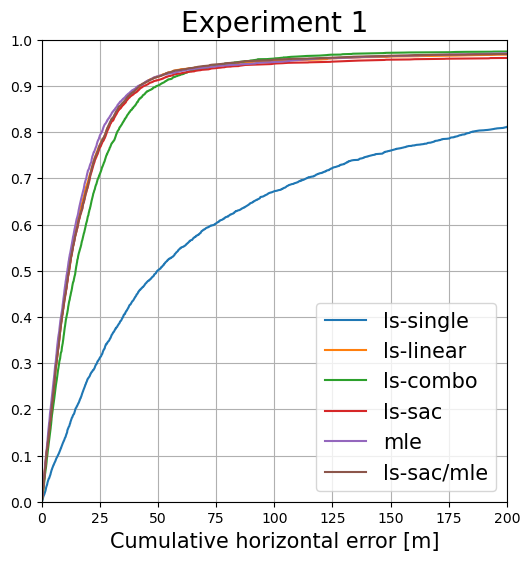

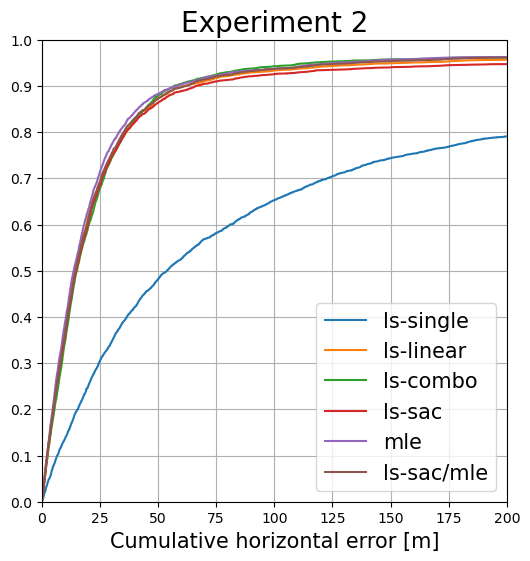

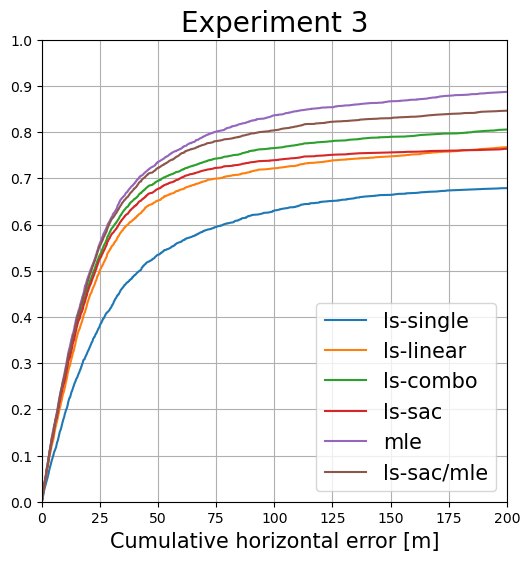

In [4]:
for experiment in all_experiments.values():
    plot_culmulative_errors(experiment, figsize=6)

### <u>Statistics</u>
For the `statistics` function, you can choose what you want to show; here are the possible inputs for the parameter `whattoshow`:

- `"all"`: Shows all statistics.
- `"E"`: East error statistics.
- `"N"`: North error statistics.
- `"U"`: Up error statistics.
- `"ENU"`: All East, North, and Up error statistics.
- `"RMSE"`: Root Mean Square Error, both 2D and 3D.
- `"2D"`: Specifically for RMSE 2D statistics.
- `"3D"`: Specifically for RMSE 3D statistics.
- `"Runtime"`: Mean runtime statistics.
- `"Min"`: Minimum error values for E, N, U.
- `"Max"`: Maximum error values for E, N, U.
- `"Std"`: Standard deviation for E, N, U errors.
- `"Mean"`: Mean values for E, N, U errors.
- `"Error < 200m"`: Percentage of errors under 200 meters.
- `"% Error < 200m"`: An alternative keyword for percentage of errors under 200 meters.

You can also put more than one inputs for whattoshow, eg., `whattoshow` = `"mean median"`

In [7]:
## Get statistics about ENU errors
for exp, res_obj in all_experiments.items():
    for scenario in scenario_types.values():
      print(f"{scenario} statistics for Experiment: {exp}")    
      df_stats = generate_statistics(res_obj, modes, scenario_type=scenario, tight=True) 
      # decide what to show
      df = statistics(df_stats, whattoshow="all")
      
        # This excludes the runtime
      print(df[df.columns[1:-1]])
      print("\n" + "-"*100 + "\n") 
    
    # latex_code = df[df.columns[:-1]].T.to_latex(header=True, longtable=True)
    # with open(f'latex_stats{exp}.tex', 'w') as f:
    #     f.write(latex_code)

static statistics for Experiment: 1
  Min E (m) Min N (m) Max E (m) Max N (m)   SD E   SD N Mean E (m) Mean N (m)  \
0   -173.61   -195.35    182.87    192.55  61.46  77.23       4.74     -10.32   
1    -42.24    -37.75     78.60     65.02  17.63  16.67       4.00       4.34   
2    -47.29    -60.04     79.40     98.13  17.37  20.38      -2.63       1.74   
3    -54.56   -192.62     81.12     71.11  18.32  21.28       2.60       4.02   
4   -148.10    -42.39     67.89    121.28  21.48  16.97       3.24       5.25   
5    -55.06   -194.26     78.98     64.95  17.96  21.45       2.87       3.45   

  Median E (m) Median N (m) RMSE 2D % Error < 200m  
0        -1.04        -3.97   62.64             74  
1         2.48         4.53   21.16             97  
2        -3.28        -0.67   21.86             97  
3         1.36         4.97   20.69             97  
4         4.52         4.12   21.32             97  
5         1.75         4.94   21.06             97  

------------------------

### <u>ENU errors plot</u>

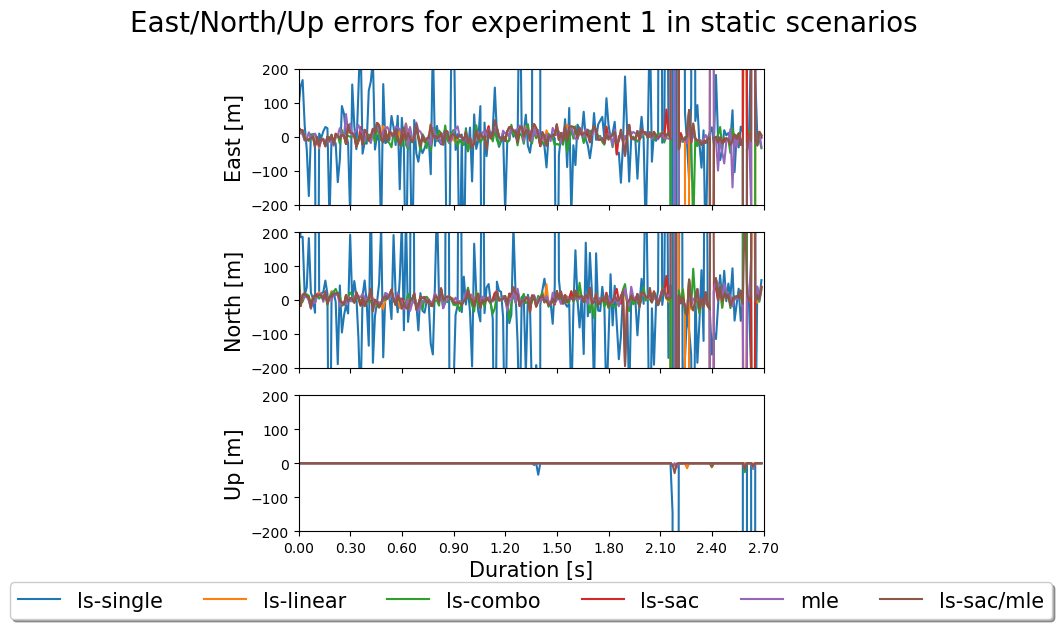

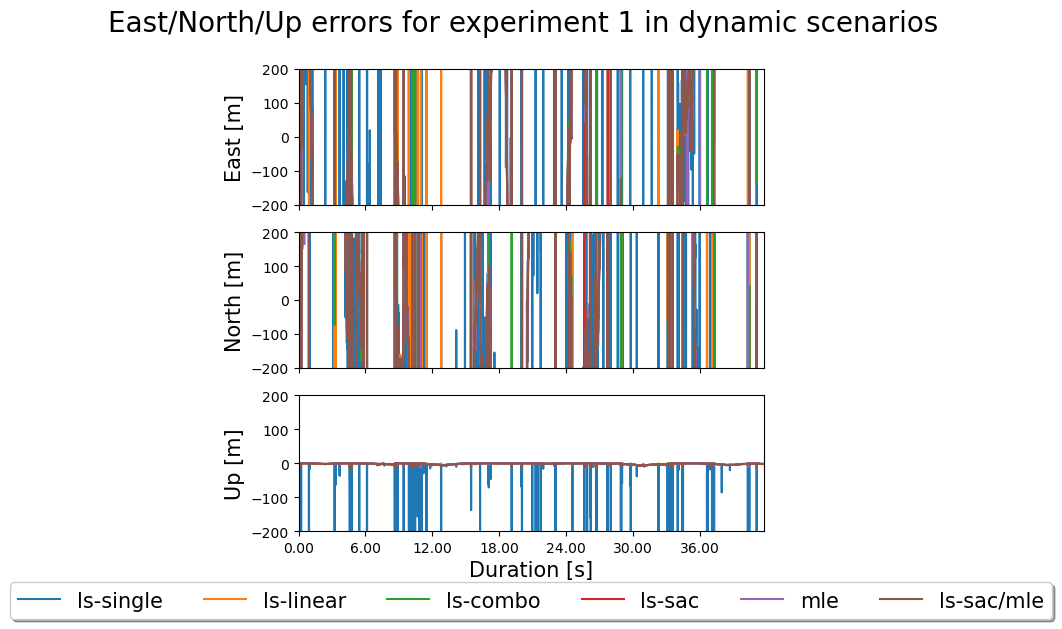

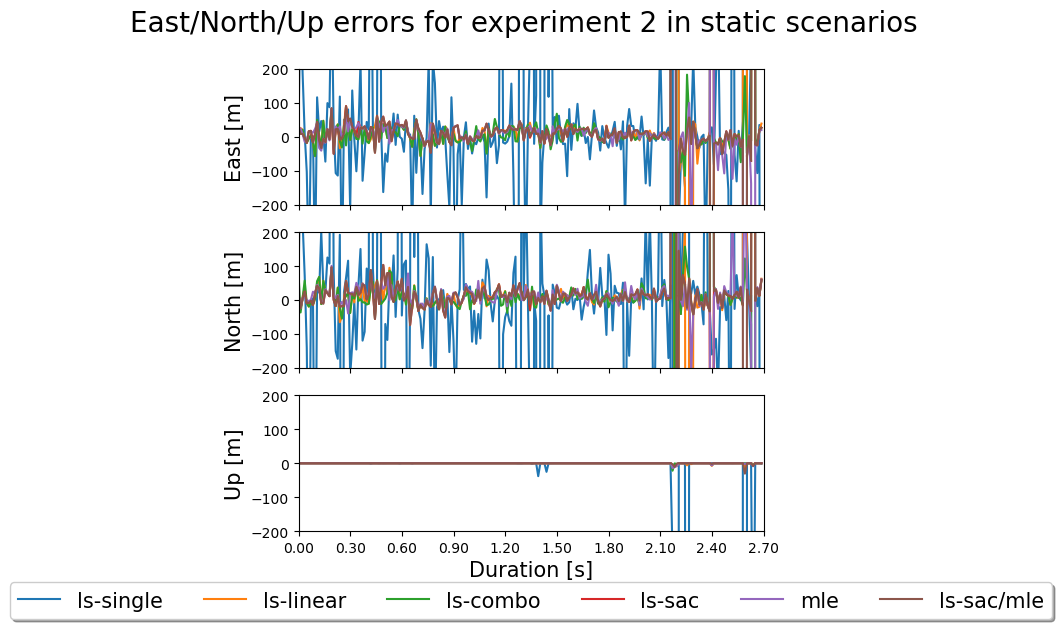

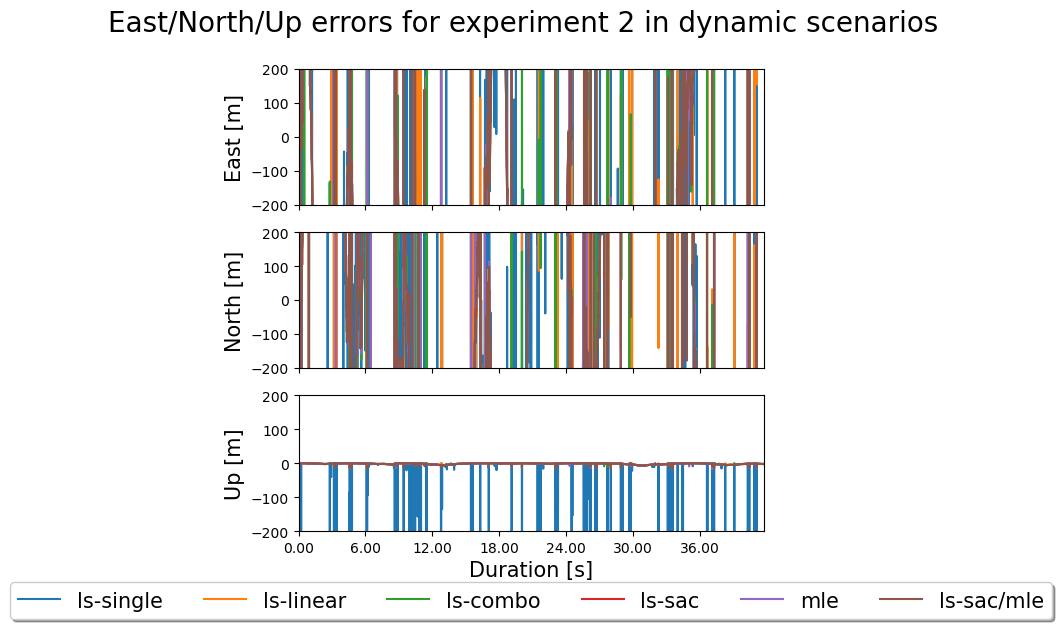

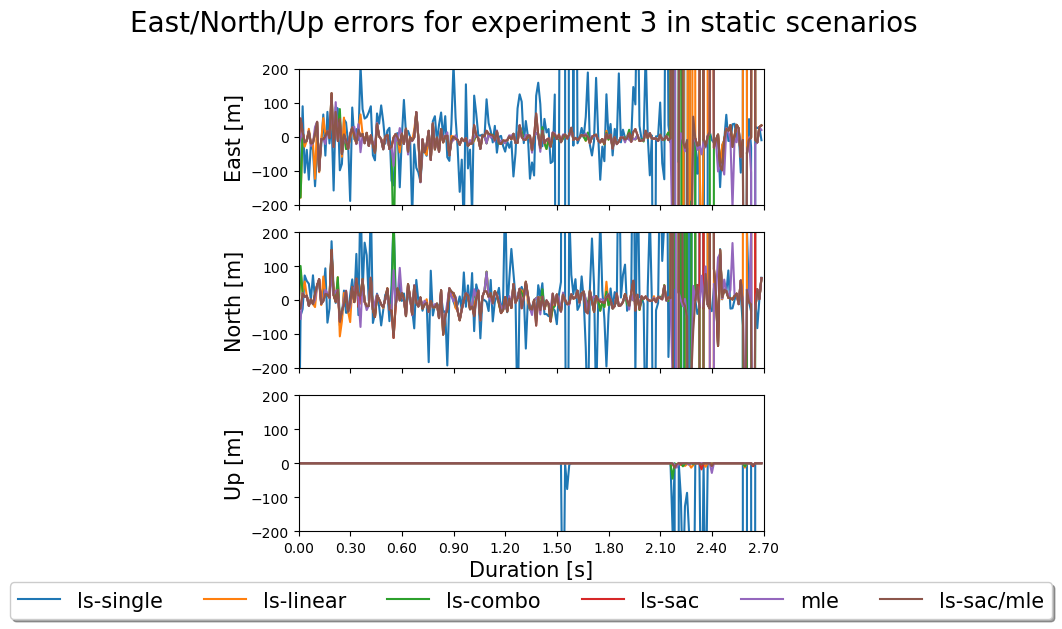

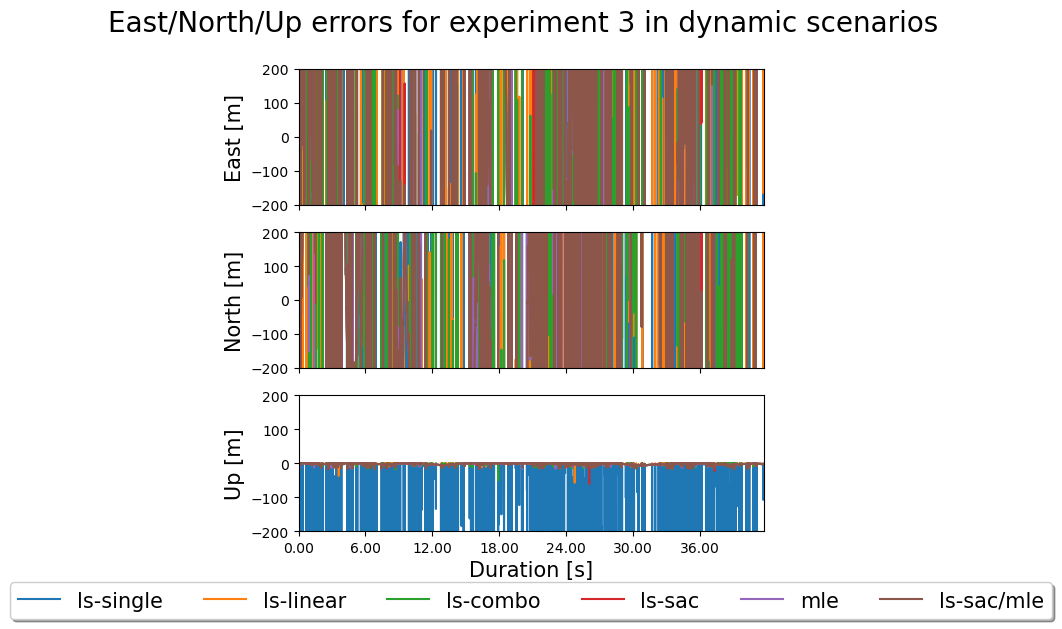

In [9]:
# Plot ENU errors
for experiment in all_experiments.values():
    # for all static scenarios
    plot_ENU_scenario(experiment, modes, scenario_types[1], axlim =[-200,200], figsize=6)
    # for all dynamic scenarios
    plot_ENU_scenario(experiment, modes, scenario_types[2], axlim =[-200,200], figsize=6)
    # for all scenarios
    #plot_ENU_scenario(experiment, scenario_types[3], figsize=6)

In [ ]:
### <u>EN plot: horizontal error but in 2D plane </u>

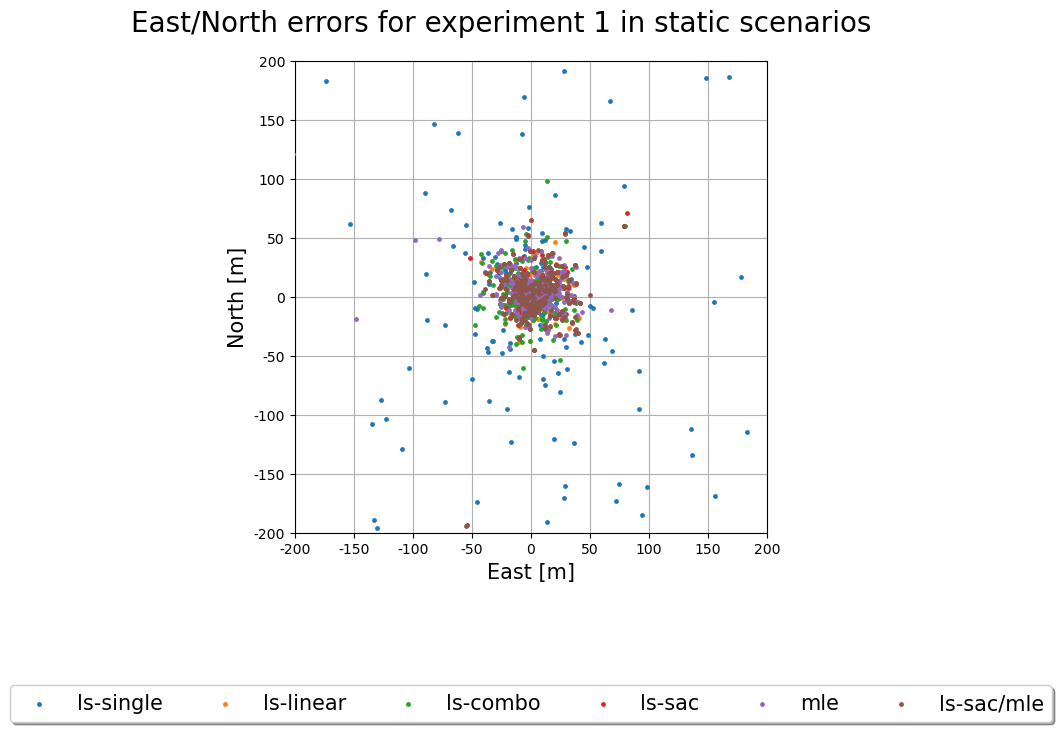

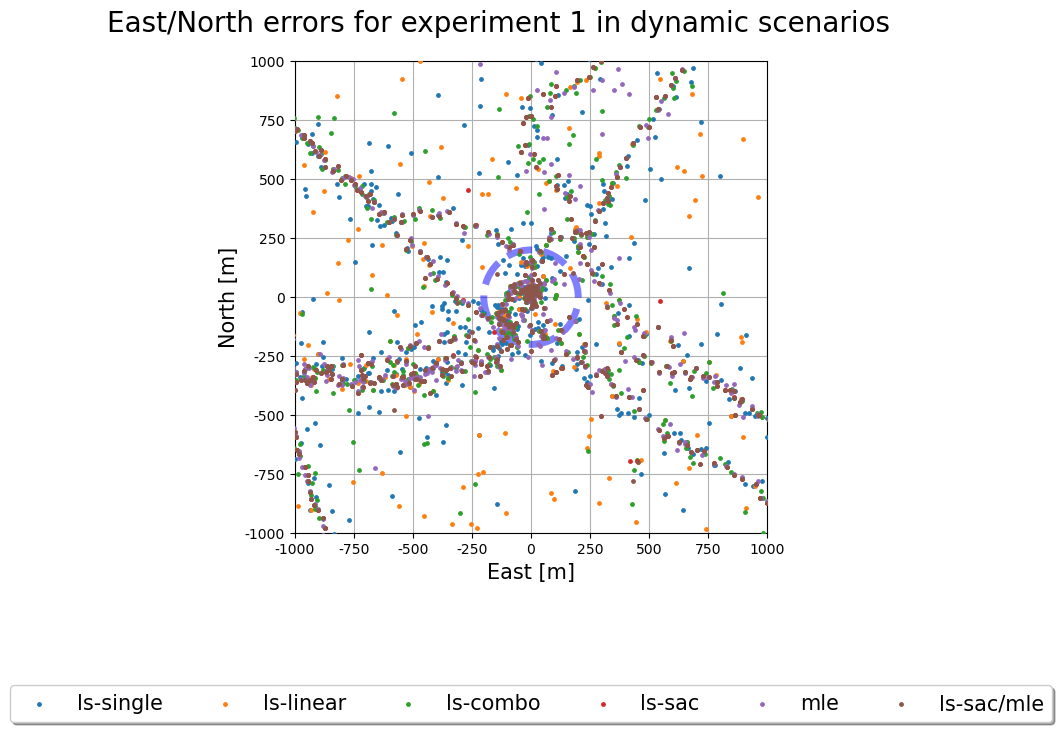

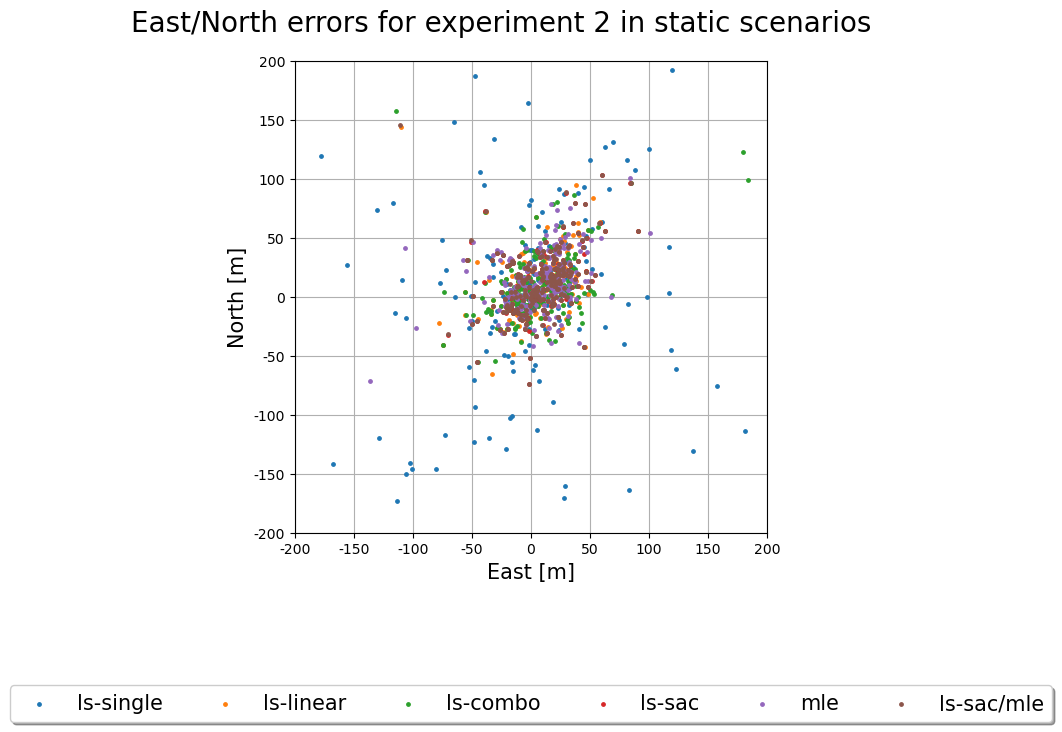

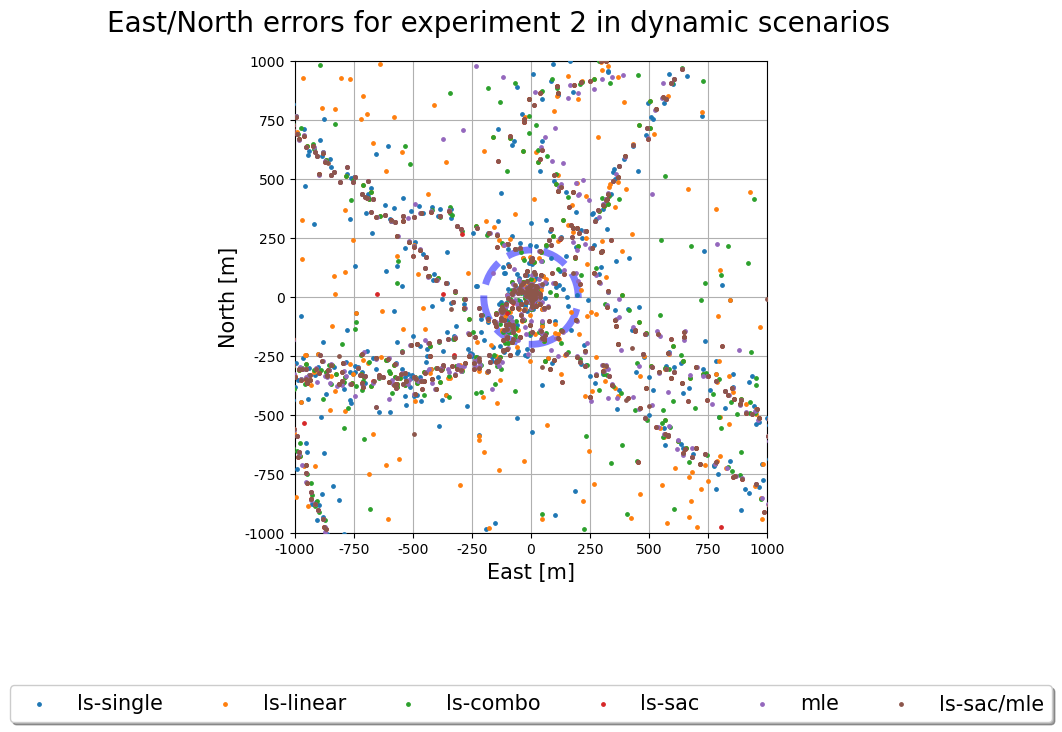

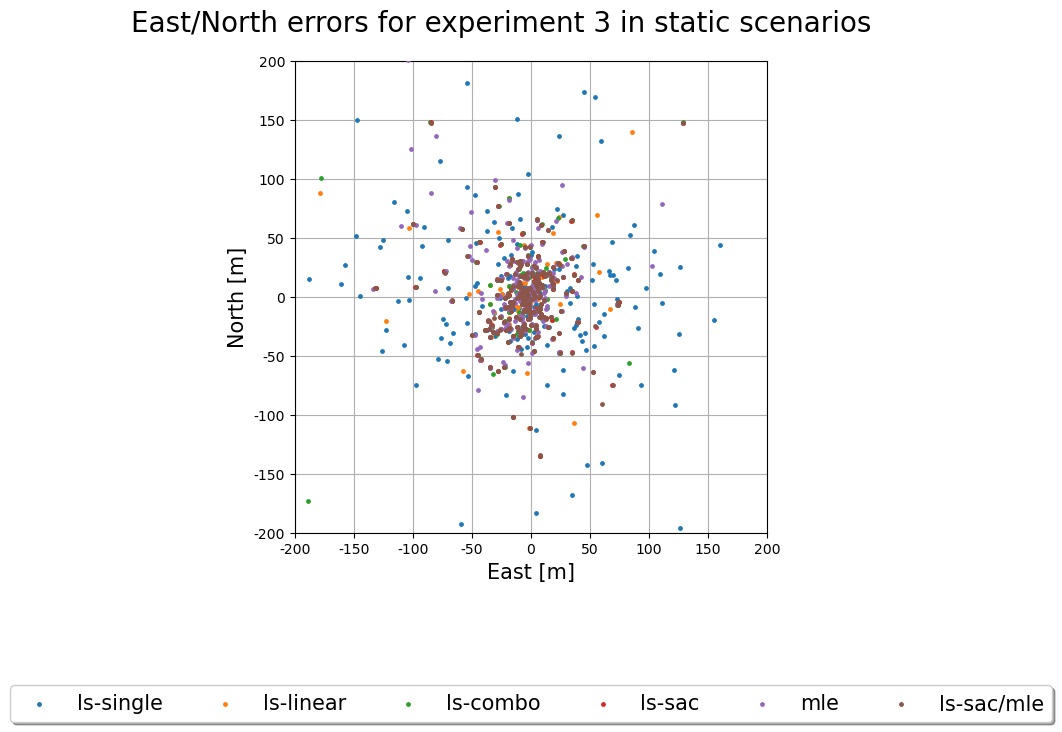

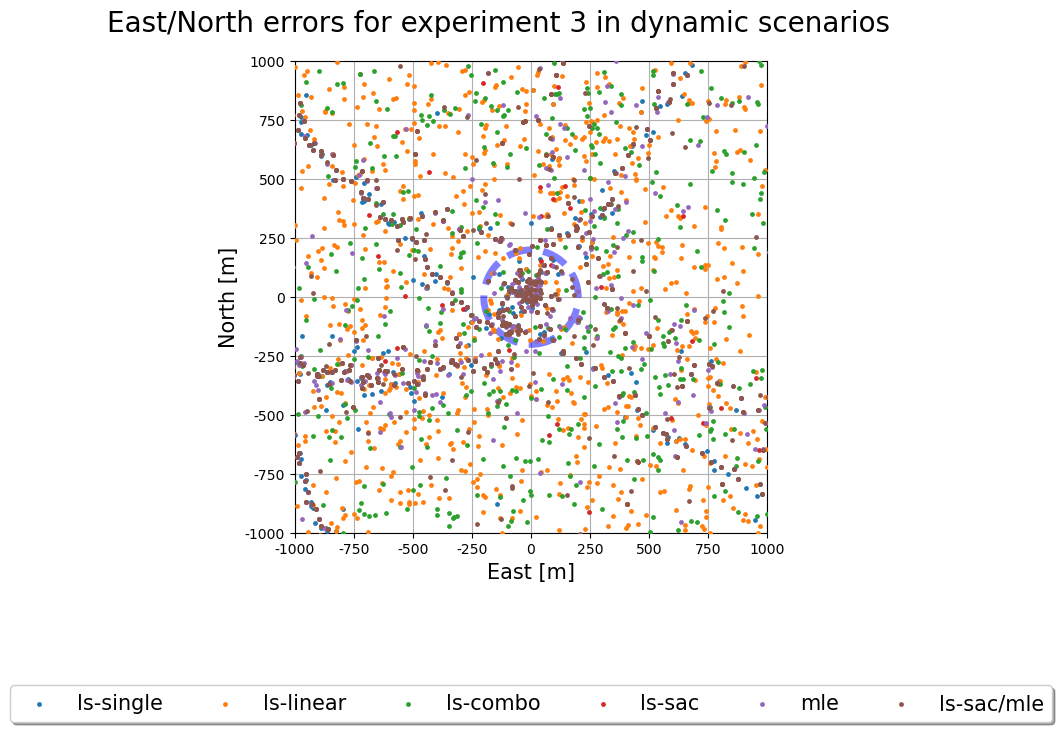

In [2]:
for experiment in all_experiments.values():
     # for all static scenarios
    plot_EN(experiment, modes, scenario_types[1], axlim =[-200,200], figsize=6)
    # for all dynamic scenarios
    plot_EN(experiment, modes, scenario_types[2], axlim =[-1000,1000], figsize=6)
    # for all scenarios
    #plot_ENU_scenario(experiment, scenario_types[3], figsize=6)

### <u>Box plot for EN errors:</u> show the distribution of numerical data and skewness by displaying the data quartiles (or percentiles) and averages.
Read more on how to analyze box plot: https://www.simplypsychology.org/boxplots.html

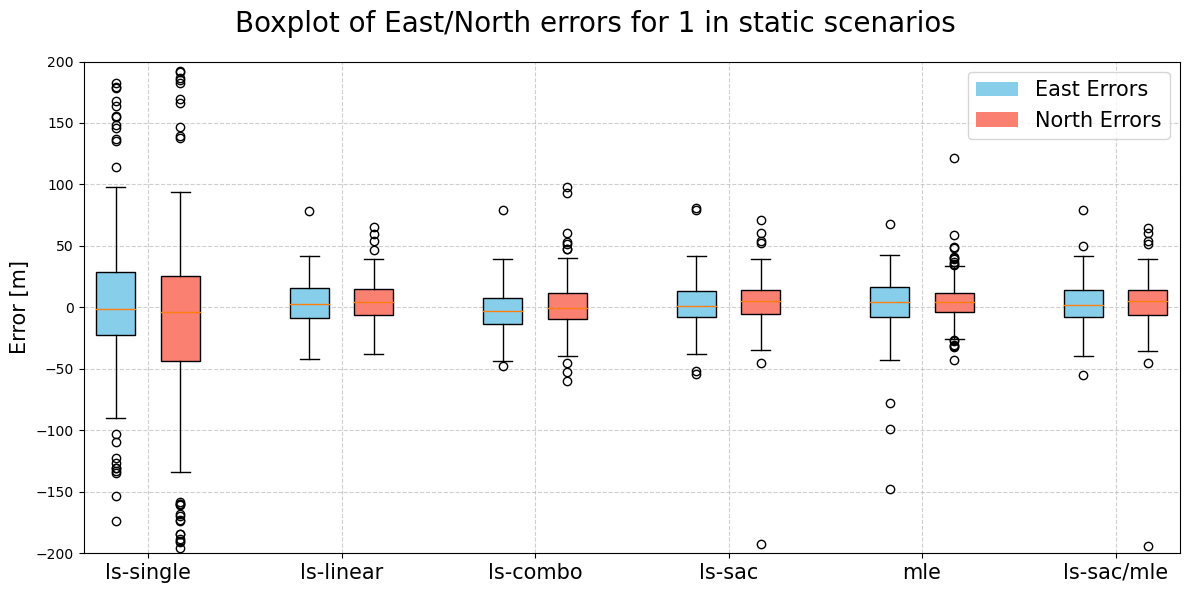

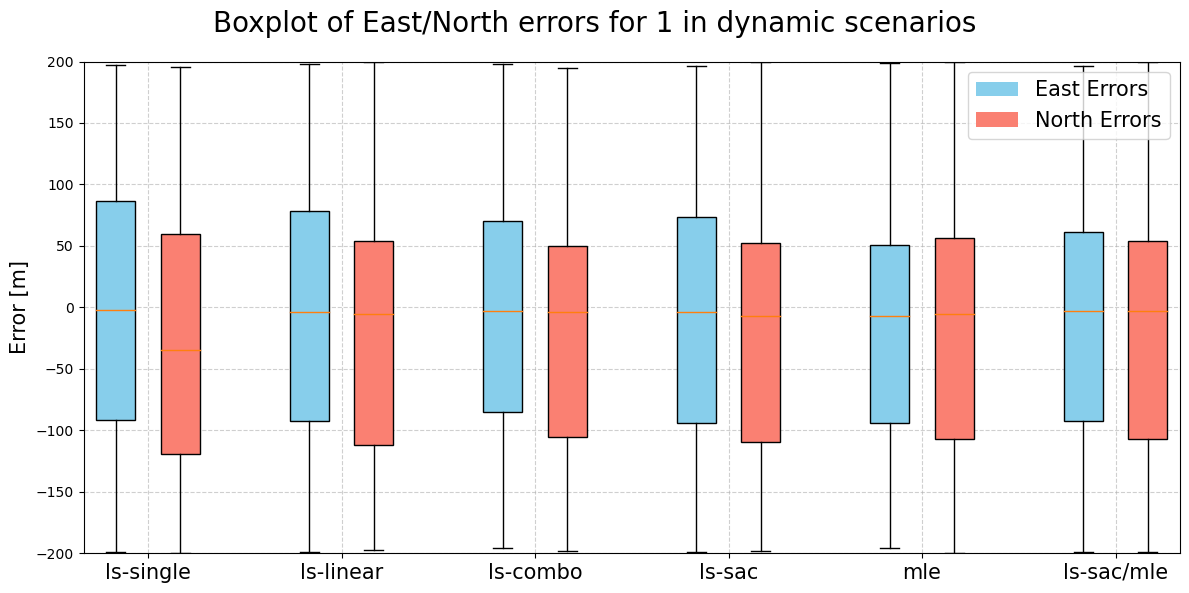

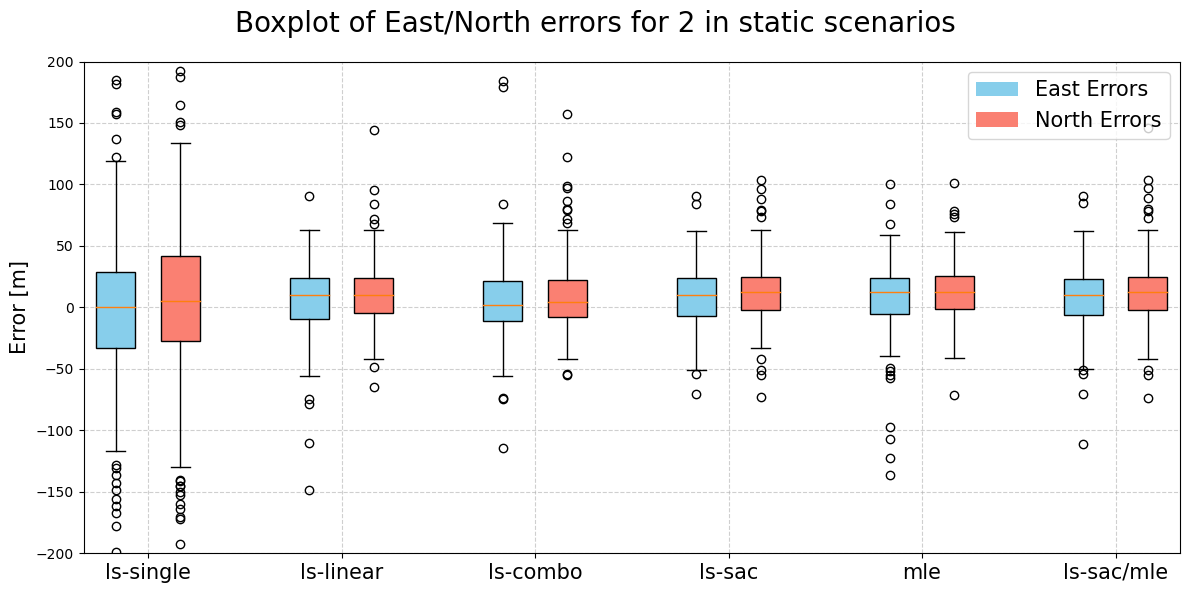

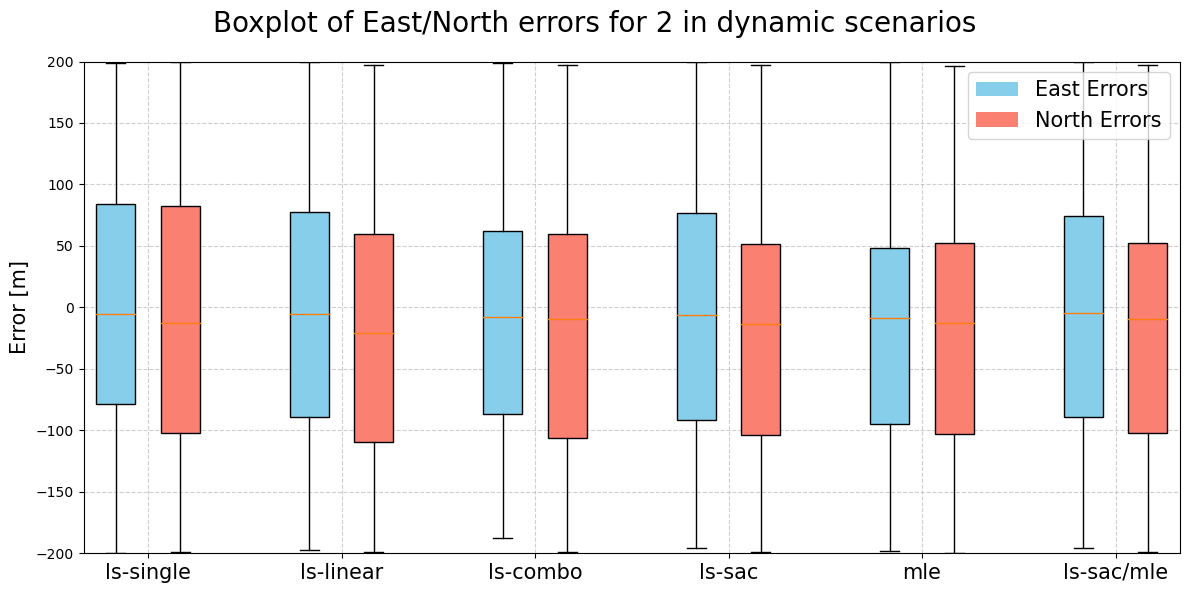

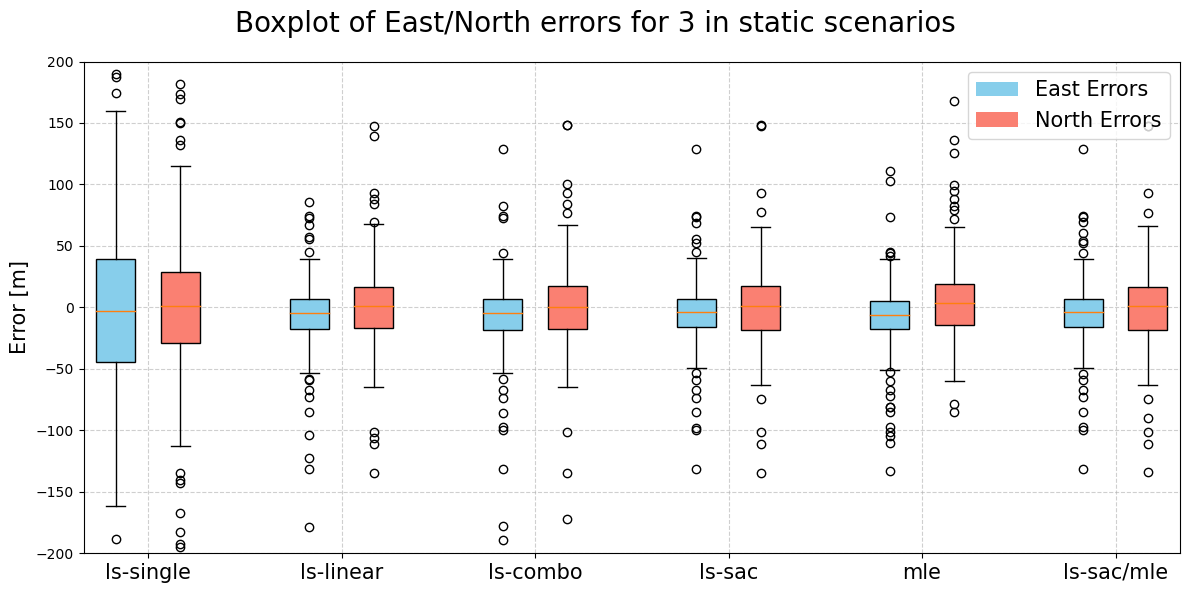

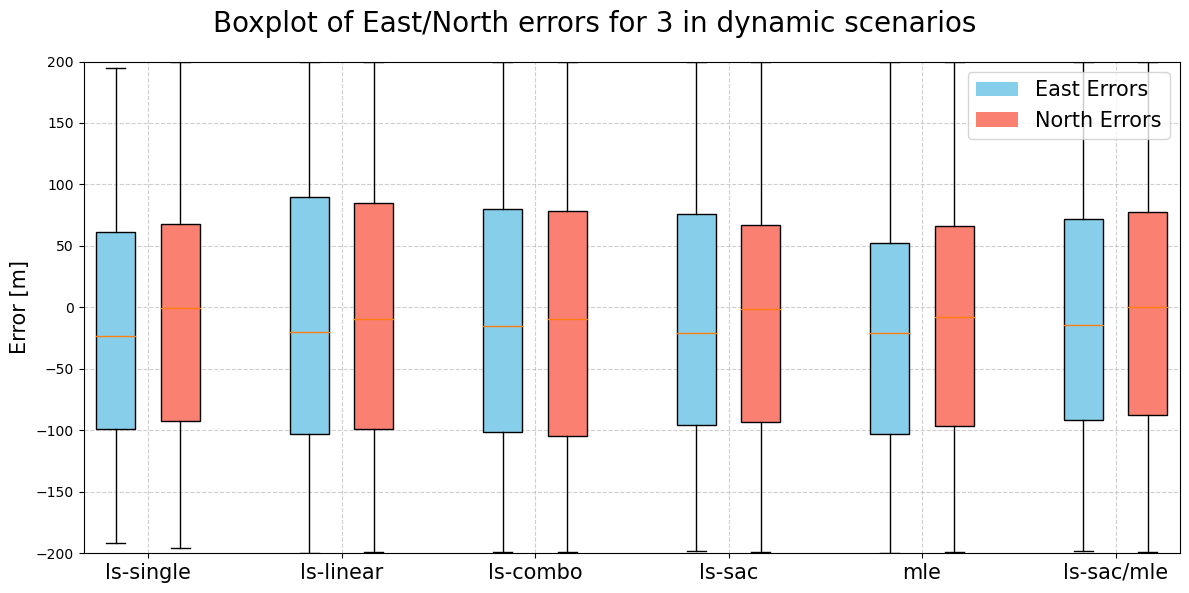

In [15]:
for experiment in all_experiments.values():
     # for all static scenarios
    plot_EN_boxplot(experiment, modes, axlim =[-200,200],  scenario_type=scenario_types[1])
    # for all dynamic scenarios
    plot_EN_boxplot(experiment, modes, axlim =[-200,200],  scenario_type=scenario_types[2])
    # for all scenarios
    #plot_ENU_scenario(experiment, scenario_types[3], figsize=6)

### <u>Map plot: data points shown in real map</u>
#### Intructions for function input
`extent` is for bounding box of the graph, recommending for this data sets:
 - static lattitude, longtitude extent around 3km from reference point is [0.027, 0.025]
 - dynamic extent around 10km from reference point is [0.0901 0.09]
 - scale: how much zoom-in you want
 But the general tip is tighten the extent and keep the zoop around 15-18

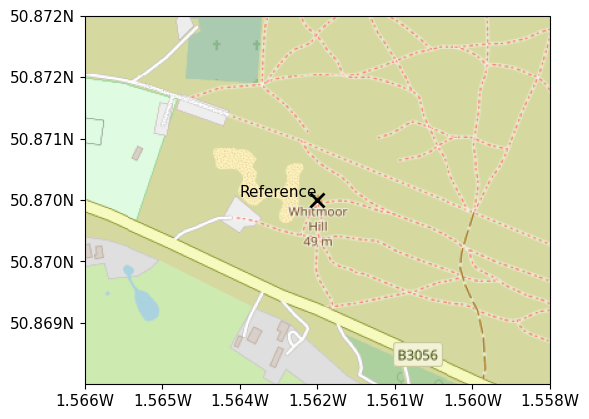

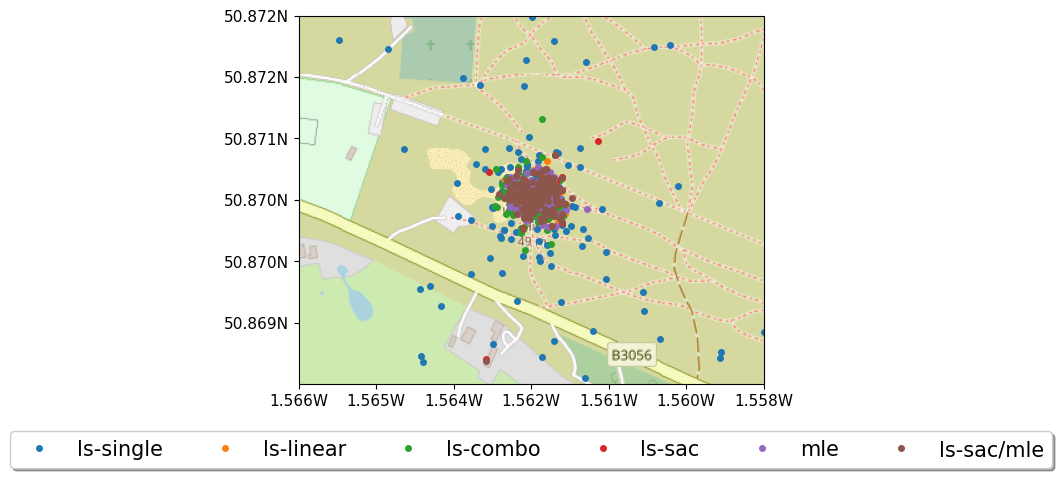

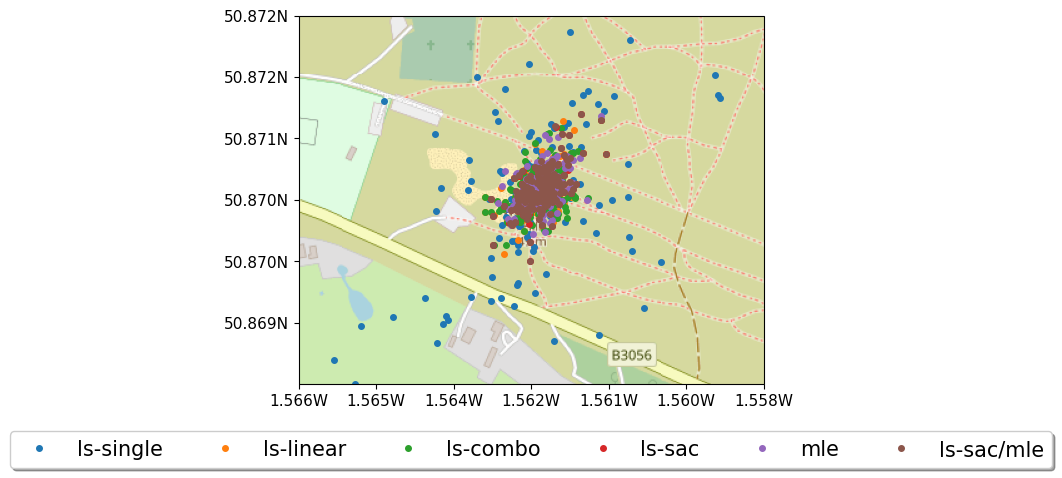

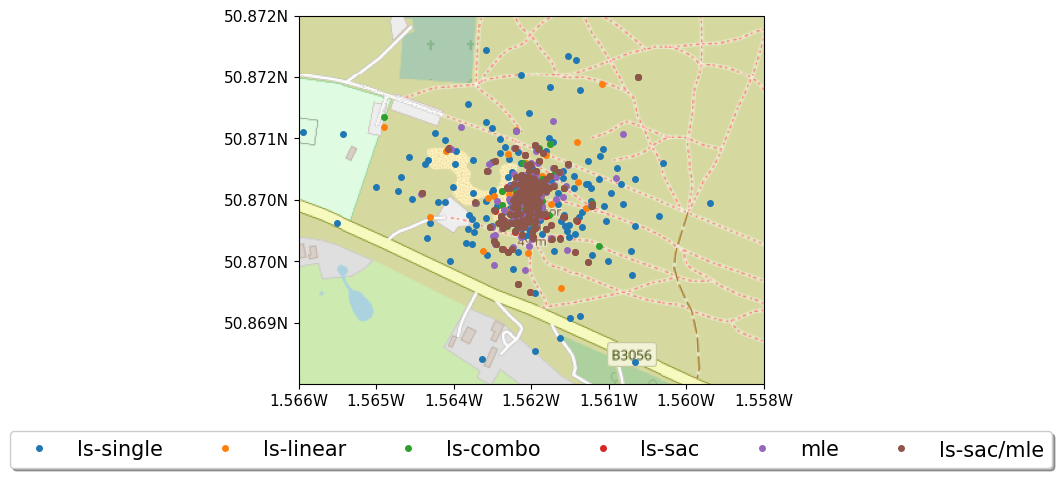

In [4]:
# Plots geographic positions on a map
plotMap(experiment, modes, scenarios[0], extent=[0.004, 0.002], scale=16, plot_type="reference", figsize=6)
for experiment in all_experiments.values():
    plotMap(experiment, modes, scenarios[0], extent=[0.004, 0.002], scale=16, plot_type="data", figsize=6)